In [3]:
from sklearn import datasets

In [4]:
boston = datasets.load_boston()

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

In [6]:
from sklearn import linear_model
from sklearn.svm import SVR, LinearSVR, NuSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn import preprocessing

In [8]:
#boston_X = boston_scaled #[:, np.newaxis, 2] # the np.newaxis makes it into a column vector
boston_X = boston.data
boston_X_scaled = preprocessing.scale(boston_X)
boston_X_train = boston_X[:-20]
boston_X_train_scaled = boston_X_scaled[:-20]
boston_X_test = boston_X[-20:]
boston_X_test_scaled = boston_X_scaled[-20:]
boston_y_train = boston.target[:-20]
boston_y_test = boston.target[-20:]

In [9]:
regressors = \
    linear_model.LinearRegression(fit_intercept=False) \
    ,linear_model.Ridge(0.1, fit_intercept=False) \
    ,linear_model.Lasso(0.01, fit_intercept=False) \
    ,LinearSVR(max_iter=1e4, fit_intercept=False) \
    ,SVR(max_iter=1e4, kernel='poly', C=1, degree=4) \
    ,SVR(max_iter=1e4, kernel='rbf', C=1, gamma=0.1) \
    ,SVR(kernel='linear', C=1) \
    ,SVR(kernel='linear', C=0.5) \
    ,SVR(kernel='linear', C=0.1) \
    ,DecisionTreeRegressor(max_depth=5) \
    ,RandomForestRegressor() \
    ,AdaBoostRegressor(learning_rate=0.9, loss='square') \
    ,BaggingRegressor()

In [10]:
# regr = linear_model.LinearRegression()
start = time.time()
for i,regr in enumerate(regressors):
    print '## '+str(i)+'. '+regr.__class__.__name__ + ':'
    print regr
    
    if type(regr) in [linear_model.LinearRegression, linear_model.Ridge, LinearSVR]:
        X_train = boston_X_train
        X_test = boston_X_test
    else:
        X_train = boston_X_train_scaled
        X_test = boston_X_test_scaled
        
    regr.fit(X_train, boston_y_train)
    
    if type(regr) in [linear_model.LinearRegression, linear_model.Ridge, LinearSVR]:
        print '\tCoefficients: ', ', '.join(['%.2f' % f for f in regr.coef_])
    
    print '\tResidual sum of squares: %.2f' % np.mean((regr.predict(X_test) - boston_y_test) ** 2)
    print '\tVariance score (R^2): %.2f\n' % regr.score(X_test, boston_y_test)

print 'Total running time: %.2f' % (time.time() - start)

## 0. LinearRegression:
LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)
	Coefficients:  -0.09, 0.05, 0.00, 2.74, -2.49, 5.85, -0.00, -0.99, 0.19, -0.01, -0.33, 0.01, -0.45
	Residual sum of squares: 20.06
	Variance score (R^2): 0.14

## 1. Ridge:
Ridge(alpha=0.1, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
	Coefficients:  -0.09, 0.05, 0.00, 2.73, -2.36, 5.84, -0.00, -0.99, 0.19, -0.01, -0.33, 0.01, -0.45
	Residual sum of squares: 20.08
	Variance score (R^2): 0.14

## 2. Lasso:
Lasso(alpha=0.01, copy_X=True, fit_intercept=False, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
	Residual sum of squares: 906.40
	Variance score (R^2): -37.77

## 3. LinearSVR:
LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=False,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000.0,
     rand

 -0.08, 0.03, -0.02, 1.26, -0.01, 6.62, -0.02, -1.00, 0.26, 0.01, -0.58, 0.01, -0.35
	Residual sum of squares: 83.33
	Variance score (R^2): -2.56

## 4. SVR:
SVR(C=1, cache_size=200, coef0=0.0, degree=4, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=10000.0, shrinking=True, tol=0.001,
  verbose=False)
	Residual sum of squares: 44.37
	Variance score (R^2): -0.90

## 5. SVR:
SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=10000.0, shrinking=True, tol=0.001, verbose=False)
	Residual sum of squares: 15.50


	Variance score (R^2): 0.34

## 6. SVR:
SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
	Residual sum of squares: 13.23
	Variance score (R^2): 0.43

## 7. SVR:
SVR(C=0.5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
	Residual sum of squares: 12.81
	Variance score (R^2): 0.45

## 8. SVR:
SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
	Residual sum of squares: 11.69
	Variance score (R^2): 0.50

## 9. DecisionTreeRegressor:
DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
	Residual sum of squares: 25.78


	Variance score (R^2): -0.10

## 10. RandomForestRegressor:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
	Residual sum of squares: 21.66
	Variance score (R^2): 0.07

## 11. AdaBoostRegressor:
AdaBoostRegressor(base_estimator=None, learning_rate=0.9, loss='square',
         n_estimators=50, random_state=None)
	Residual sum of squares: 25.44


	Variance score (R^2): -0.09

## 12. BaggingRegressor:
BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)
	Residual sum of squares: 27.09
	Variance score (R^2): -0.16

Total running time: 0.64


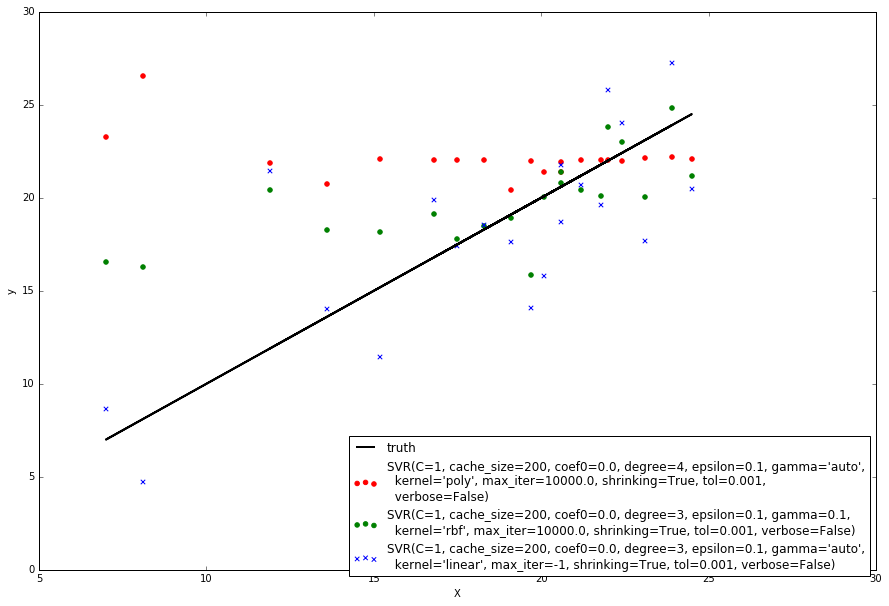

In [9]:
plt.figure(figsize=(15,10))
plt.scatter(boston_y_test, regressors[4].predict(boston_X_test_scaled), label=str(regressors[4]), color='r')
plt.scatter(boston_y_test, regressors[5].predict(boston_X_test_scaled), label=str(regressors[5]), color='g')
plt.scatter(boston_y_test, regressors[6].predict(boston_X_test_scaled), label=str(regressors[6]), color='b',marker='x')
plt.plot(boston_y_test, boston_y_test, color='black', linewidth=2, label='truth')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(bbox_to_anchor=(1,.25))
# plt.xticks(())
# plt.yticks(())
plt.show()